# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 50
* Students: Görkem Çamli, Raphael Laporte, Ilija Gjorgjiev, Murat Genc
* Dataset: Spammers on Social Network

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [ ]:
adjacency =  # the adjacency matrix
n_nodes =  # the number of nodes in the network
n_edges =  # the number of edges in the network

In [2]:
relations = pd.read_csv('data/filtered_relations.csv')
users = pd.read_csv('data/filtered_users.csv')

nodes = users[['User Id', "Time", "Gender", "Age Range", "Spammer Label"]]
num_nodes = len(nodes)

edges = relations[["src", "dst", "relation"]]
num_edges = len(edges)

In [7]:
print(num_nodes)
print(num_edges)

62173
83176


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [1]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [2]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if(seed == None):
        seed = np.random.randint(9999999)
    np.random.seed(seed)
    # Your code here.
    adjacency = np.zeros((n, n), dtype=np.dtype('>i1'))
    for i in range(0, n):
        for j in range(i+1, n):
            #If a random number is higher or equal to the edge probability, create an edge, otherwise leave it the same.
            #Do this only for edges where j is bigger than i. Since it means that we have already runned an example to that edge.
            rnd = np.random.random()
            if(p > rnd):
                adjacency[i][j] = 1
                adjacency[j][i] = 1
    
    return adjacency

Text(0.5, 1.05, 'Erdos-Renyi (5, 0.6)')

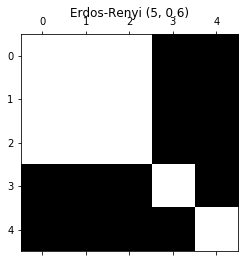

In [3]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5, 1.05, 'Erdos-Renyi (10, 0.4)')

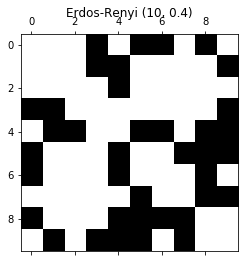

In [4]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [8]:
# Your code here.
#Calculate probability of having an edge in our previous graph, with respect to the already given edges.
prob = num_edges / (num_nodes * (num_nodes - 1) / 2)
print(prob)
print(num_edges/num_nodes)
net_er_model = erdos_renyi(num_nodes, prob)

4.303594706416666e-05
1.3378154504366848


In [15]:
# number of nodes we get from erdos model
np.sum(net_er_model)/2

83316.0

**Your answer here.**

The parameter for the number of nodes is the same as the number of nodes in our original graph.

The number of edges in the original graph is 83176 and our graph is directed. We also made an undirected graph, but we are not sure which number of edges we should consider. Thus, we considered the number of edges in the original graph(83176), to be the number of undirected edges, which is basically the same 

We calculate the probability parameter, by dividing the number of edges that we have in our original graph(83176), by the number of maximum edges. In this way we'll get an edge probability parameter.

We could also easily make the function to work for directed graphs. We could do that by setting adjacency[i][j] = 1, only when the condition for probability is satisfied and go through the whole graph with a given probability. But since it was not asked we did not do it, even though it would be much more appropriate for our original graph.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [69]:
def barabasi_albert(n, m, m0=2, seed=None, fullyConnected=False):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if(seed == None):
        seed = np.random.randint(9999999)
    np.random.seed(seed)
    if(m > m0):
        print("Warning: m should be less than or equal to m0, new m0 is: m0=m")
        m0=m
        #return
    
    # initialize the graph 
    adj = None
    if(fullyConnected):
        adj = np.ones((m0, m0), dtype=np.dtype('>i1'))
        np.fill_diagonal(adj, 0)
    else:
        adj = createInitialGraph2(m0, seed)
    
    # develop the network with growth and preferential attachment
    # increase the previous network to the size n by padding the n-m0 nodes, initializing them to 0
    adjacency = np.lib.pad(adj, ((0,n-m0),(0,n-m0)), 'constant', constant_values=(0))
    sum_kj = np.sum(adjacency)
    ki = adjacency.sum(axis=1)
    for i in range(m0, n):
        # add new random edge until node i has m edges
        if(i%100==0):
            print("Enter Loop", i)
        nodej = i
        edges_added = 0
        while(edges_added < m):
            # choose a random node between node 0 to i (not n)
            # make sure j and i are not the same node
            while(nodej == i or adjacency[i][nodej] == 1):
                nodej = np.random.randint(i) 
            
            if(ki[nodej] == 0):
                ki[nodej] = 1
            prob = (float) (ki[nodej] / sum_kj)
            # draw a random number from a uniform distribution btw [0,1]
            r = np.random.uniform()
            if(r < prob):
                sum_kj = sum_kj + 1
                adjacency[i][nodej] = 1
                adjacency[nodej][i] = 1
                ki[nodej]=ki[nodej]+1
                ki[i]=ki[i]+1
                edges_added = edges_added+1
    print(np.sum(adjacency))
    return adjacency

In [70]:
# helper functions
def createInitialGraph2(m0, seed):
    # start with m0 nodes and choose links arbitrarily (at least 1 link per node)
    adjacency = np.zeros((m0, m0), dtype=np.dtype('>i1'))
    np.random.seed(seed)
    connected = False
    edges_num = 0
    k = 0
    old_k = 0.5
    max_edges = (m0 * (m0 - 1)) / 2
    while(connected == False):
        # connect nodes randomly until you get at least 1 link per node
        n1 = np.random.randint(m0)
        n2 = np.random.randint(m0)
        #print(n1, n2)
        if(adjacency[n1][n2] == 0 and n1 != n2):
            adjacency[n1][n2] = 1
            adjacency[n2][n1] = 1 
            edges_num = edges_num + 1
            k = (2*edges_num) / m0  
        #print("k= ", k)
        #print("oldk=", old_k)
        if (( k >= 1 and old_k + 0.5 == k) or max_edges == edges_num):
            old_k = k + 0.5
            # if the graph is connected then each node has at least 1 link
            # print()
            flag = checkConnected2(adjacency)
            if(flag):
                connected=True

    return adjacency

def checkConnected2(adj):
    def visit(adjacency, visited_nodes, current_node):
        neighbors = adjacency[current_node]
        
        for i in np.nonzero(neighbors)[0]: 
      
            if (visited_nodes[i] == 0): 
                visited_nodes[i] = 1;
                visited_nodes = visit(adjacency, visited_nodes, i)
            
        return visited_nodes
    def start_dfs (adjacency, visited_nodes, current_node ):
        visited_nodes_1 = np.copy(visited_nodes)
        visited_nodes_1[current_node] = 1 
        return visit(adjacency, visited_nodes_1,current_node)
    def connected_graph(adjacency):
        touched_nodes = np.zeros(adjacency.shape[0])
        #print(adjacency.shape[0], np.sum(touched_nodes))
        touched_nodes = start_dfs(adjacency, touched_nodes, 0)
        #print(adjacency.shape[0], np.sum(touched_nodes))
        return (adjacency.shape[0] == np.sum(touched_nodes))
    return connected_graph(adj)

8


Text(0.5,1.05,'Barabasi-Albert (5, 1)')

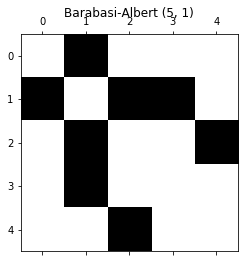

In [71]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

34


Text(0.5,1.05,'Barabasi-Albert (10, 2)')

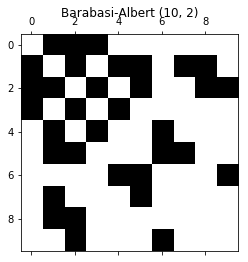

In [72]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

In [ ]:
ba = barabasi_albert(10, 2, 3)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

In [10]:
n_nodes = 62173
n_edges = 83176 

In [74]:
m = 1
m0 = 62150
ba = barabasi_albert(n_nodes, m, m0, fullyConnected=True)

3862560396


For the barabasi_albert function, n is equal to the number of nodes in our original graph which is 62173.     
The perfect parameters to use, would be m0 = 3500 and m = 1. Since in this case on average we would get around 15000-20000 edges until we get a connected component. Then in the development network we would get the remaining number of edges from the development part according to this formula:  __Develop the network part:__ $m * (n - m0)$ edges.

For the initialization part, we would get minimum of m0 edges and maximum of (m0 * (m0 - 1) / 2) however, since all the nodes are connected randomly without any bias, we do not have overall control of the number of edges here.

 The cell takes input: n = exact number of nodes in our original graph, m0 = 62150 and m = 1. With this we show that the algorithm works and finishes. There are 2 parts implemented for the initialization part, the intial graph can either be constructed randomly, until we get a connected component or we automatically construct a fully connected component of m0 nodes. In our specific case we constructed a fully connected component, due to the size of our original matrix, which took us hours to run and it didn't finish at all. For other test cases, we use the random initialization. 
Note: We assumed undirected graph

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [76]:
# Your code here.

#The number of edges in our real network is:
print(n_edges)

#The number of edges in the Erdős–Rényi network:
#The cell has already been ran, so we do not want to run it again since it takes quite a lot of time.
#That is why we just print the number.
print(83316.0)

#The number of edges in the Barabási-Albert network:
#In the initiliazation part we do not have control over how many edges will be created. 
#Due to hours of waiting for the algorithm to finish, depth recursion problems, etc.
#We decided to use a fully connected component, which explain the big number of edges being totally different than the 
#edges in the original graph.
print(np.sum(ba)/2)

83176
83316.0
1931280198.0


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [ ]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    # Your code here.
    
    return kl

In [ ]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [ ]:
# Your code here.

### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [ ]:
# Your code here.

**Your answer here.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Your answer here.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Your answer here.**

### Question 11

Explain (in short) how the chosen model works.

**Your answer here.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [ ]:
# Your code here.

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [ ]:
# Your code here.

Are the results what you expected? Explain.

**Your answer here.**